In [ ]:
!pip install ultralytics
!pip install torch
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.1 MB/s eta 0:00:00


**Download dataset**

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="HI42QRXkU9xSlq7DHhks")
project = rf.workspace("ai-project-i3wje").project("waste-detection-vqkjo")
dataset = project.version(9).download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to waste-detection-9 in yolov8:: 100%|██████████| 15264/15264 [00:05<00:00, 2609.70it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**Train**

In [ ]:
!pip install ultralytics
!pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 44.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import onnx

# Create a new model
model = YOLO('yolov8n.yaml')

# Load a pretrained model to avoid training from scratch
model = YOLO('yolov8n.pt')

# Define the path to the dataset's YAML file
path = '/content/datasets/waste-detection-9/data.yaml'

# Train the model with a batch size of 64 and save results in the 'runs' directory
results = model.train(data=path, epochs=30, batch=64, project='runs', name='waste_detection')

# Validate the model using the validation dataset
results = model.val()

# Save the trained model explicitly
model.save('runs/waste_detection/best.pt')



Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/waste-detection-9/data.yaml, epochs=30, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs, name=waste_detection3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

train: Scanning /content/datasets/waste-detection-9/train/labels.cache... 6684 images, 12 backgrounds, 0 corrupt: 100%|██████████| 6684/6684 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3078, len(boxes) = 14878. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/waste-detection-9/valid/labels.cache... 628 images, 0 backgrounds, 0 corrupt: 100%|██████████| 628/628 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 278, len(boxes) = 1273. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/waste_detection3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/waste_detection3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      9.65G       1.42      3.883      1.618        113        640: 100%|██████████| 105/105 [02:21<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.95s/it]

                   all        628       1273      0.491      0.283      0.287      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      9.09G      1.391      2.654      1.588        117        640: 100%|██████████| 105/105 [02:17<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:10<00:00,  2.07s/it]

                   all        628       1273      0.665      0.441      0.503      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      9.01G      1.353      2.233      1.537        108        640: 100%|██████████| 105/105 [02:18<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]

                   all        628       1273      0.661      0.507      0.547      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      9.06G      1.326      1.966      1.494        128        640: 100%|██████████| 105/105 [02:23<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.41s/it]

                   all        628       1273      0.655      0.515      0.553      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      9.04G      1.291      1.767      1.464        132        640: 100%|██████████| 105/105 [02:22<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.38s/it]

                   all        628       1273      0.715      0.591      0.625      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      9.14G      1.257      1.611       1.43        126        640: 100%|██████████| 105/105 [02:18<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.79s/it]

                   all        628       1273       0.72      0.658      0.705      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      9.14G       1.23      1.496      1.413        121        640: 100%|██████████| 105/105 [02:18<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.94s/it]

                   all        628       1273      0.819      0.705      0.746      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      9.12G      1.211      1.397      1.392        126        640: 100%|██████████| 105/105 [02:15<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:10<00:00,  2.09s/it]

                   all        628       1273      0.711      0.712      0.741      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      9.09G      1.187      1.322      1.371         84        640: 100%|██████████| 105/105 [02:18<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:10<00:00,  2.07s/it]

                   all        628       1273      0.694      0.758      0.771      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      9.14G      1.168       1.25      1.353        131        640: 100%|██████████| 105/105 [02:17<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.95s/it]

                   all        628       1273      0.818      0.696      0.757      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30       9.1G      1.151      1.202      1.335        102        640: 100%|██████████| 105/105 [02:17<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.29s/it]

                   all        628       1273      0.819      0.717      0.753      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      9.09G      1.133      1.174      1.331        104        640: 100%|██████████| 105/105 [02:17<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:10<00:00,  2.11s/it]

                   all        628       1273      0.764      0.725      0.773      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      9.13G      1.105      1.103      1.309        103        640: 100%|██████████| 105/105 [02:16<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:10<00:00,  2.13s/it]

                   all        628       1273      0.771      0.782      0.804      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      9.01G      1.095      1.081      1.302        100        640: 100%|██████████| 105/105 [02:19<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:10<00:00,  2.02s/it]

                   all        628       1273       0.82      0.771      0.794      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      9.09G      1.089      1.046      1.291         68        640: 100%|██████████| 105/105 [02:17<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.97s/it]

                   all        628       1273      0.853      0.758      0.812      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      9.09G      1.067      1.013      1.276        119        640: 100%|██████████| 105/105 [02:17<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.55s/it]

                   all        628       1273      0.782      0.789      0.799      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      9.09G      1.064      1.014      1.282        101        640: 100%|██████████| 105/105 [02:19<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.29s/it]

                   all        628       1273      0.779      0.796      0.814      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      9.14G      1.041      0.977       1.27        115        640: 100%|██████████| 105/105 [02:19<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.73s/it]


                   all        628       1273       0.77      0.791      0.802      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      9.06G      1.037     0.9519      1.261        121        640: 100%|██████████| 105/105 [02:18<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:10<00:00,  2.03s/it]

                   all        628       1273      0.838      0.783      0.811      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      9.04G      1.022     0.9252       1.25        101        640: 100%|██████████| 105/105 [02:14<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:10<00:00,  2.11s/it]

                   all        628       1273      0.854      0.764      0.821      0.603


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      9.12G     0.9778     0.7838       1.25         66        640: 100%|██████████| 105/105 [02:10<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:10<00:00,  2.03s/it]

                   all        628       1273      0.797      0.787      0.817      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      9.09G      0.951     0.7384      1.229         61        640: 100%|██████████| 105/105 [02:09<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.36s/it]

                   all        628       1273      0.818        0.8      0.819      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      9.14G     0.9343     0.7176      1.218         47        640: 100%|██████████| 105/105 [02:09<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:10<00:00,  2.11s/it]

                   all        628       1273      0.815        0.8      0.823      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      9.01G     0.9192     0.6972      1.207         73        640: 100%|██████████| 105/105 [02:07<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.53s/it]

                   all        628       1273       0.82      0.812      0.827      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      9.02G     0.9063     0.6749      1.194         43        640: 100%|██████████| 105/105 [02:10<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.49s/it]

                   all        628       1273       0.83      0.798      0.826      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      8.99G     0.8868     0.6455      1.182         71        640: 100%|██████████| 105/105 [02:10<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.76s/it]

                   all        628       1273      0.855      0.783       0.83      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      9.07G      0.876      0.635      1.176         64        640: 100%|██████████| 105/105 [02:08<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.89s/it]

                   all        628       1273      0.842      0.794      0.831      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      9.14G     0.8581     0.6203      1.161         42        640: 100%|██████████| 105/105 [02:10<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.80s/it]

                   all        628       1273      0.845       0.79      0.832      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      9.06G      0.842     0.6049       1.15         57        640: 100%|██████████| 105/105 [02:10<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.36s/it]

                   all        628       1273      0.839       0.81      0.832      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      9.01G     0.8398     0.6019       1.15         84        640: 100%|██████████| 105/105 [02:10<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.88s/it]

                   all        628       1273      0.842      0.806      0.833      0.632



30 epochs completed in 1.218 hours.
Optimizer stripped from runs/waste_detection3/weights/last.pt, 6.3MB
Optimizer stripped from runs/waste_detection3/weights/best.pt, 6.3MB

Validating runs/waste_detection3/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,009,743 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:16<00:00,  3.23s/it]


                   all        628       1273      0.842      0.806      0.833      0.632
               battery         70        133      0.928      0.878      0.935      0.857
                   can         37         66      0.903      0.844      0.933      0.712
        cardboard_bowl          7          7      0.319      0.286       0.29      0.237
         cardboard_box         22         26       0.96      0.921      0.916      0.712
chemical_plastic_gallon         13         15      0.964          1      0.995      0.786
    chemical_spray_can         74        130      0.848      0.969      0.938      0.743
            light_bulb         45         54      0.979          1      0.995      0.844
          paint_bucket         30         30      0.984          1      0.995      0.789
           plastic_bag         29         67      0.734      0.612      0.784      0.518
        plastic_bottle        102        135      0.996      0.837      0.917      0.695
    plastic_bottle_c

val: Scanning /content/datasets/waste-detection-9/valid/labels.cache... 628 images, 0 backgrounds, 0 corrupt: 100%|██████████| 628/628 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 278, len(boxes) = 1273. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:13<00:00,  1.36s/it]


                   all        628       1273      0.841      0.806      0.833      0.632
               battery         70        133      0.928      0.879      0.935      0.857
                   can         37         66      0.903      0.844      0.934      0.713
        cardboard_bowl          7          7      0.319      0.286       0.29      0.237
         cardboard_box         22         26       0.96      0.921      0.916      0.712
chemical_plastic_gallon         13         15      0.964          1      0.995      0.787
    chemical_spray_can         74        130      0.847      0.969      0.938      0.744
            light_bulb         45         54      0.979          1      0.995      0.844
          paint_bucket         30         30      0.984          1      0.995      0.789
           plastic_bag         29         67      0.734      0.612      0.784      0.517
        plastic_bottle        102        135      0.986      0.837      0.917      0.693
    plastic_bottle_c

In [ ]:
import shutil

# Source folder to be downloaded
source_folder = '/content/datasets/runs/detect/train'

# Destination ZIP file name
zip_filename = '/content/train.zip'

# Create a ZIP file of the source folder
shutil.make_archive(zip_filename[:-4], 'zip', source_folder)

# Move the ZIP file to the Colab root directory (optional)
# shutil.move(zip_filename, '/content/')

print(f'Zipped folder {source_folder} to {zip_filename}')

# You can then download the ZIP file from Colab using this code:
from google.colab import files
files.download(zip_filename)


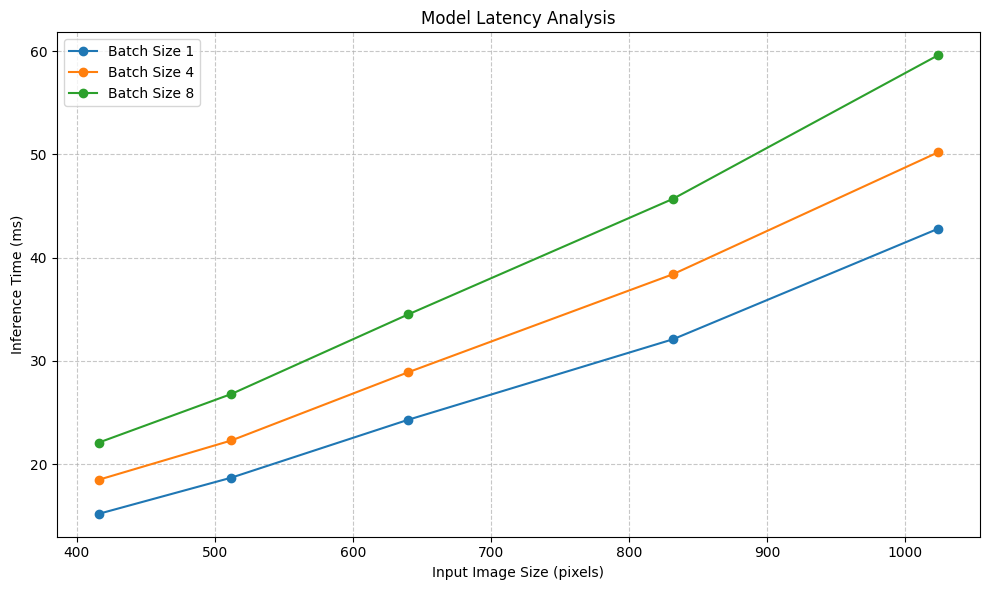

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_latency(image_sizes, latencies, batch_sizes=None):
    """
    Plot model latency analysis

    Args:
        image_sizes: List of input image sizes
        latencies: List of corresponding inference times (ms)
        batch_sizes: Optional list of batch sizes used
    """
    plt.figure(figsize=(10, 6))

    if batch_sizes:
        # Create multiple lines for different batch sizes
        for batch_size, latency in zip(batch_sizes, latencies):
            plt.plot(image_sizes, latency, marker='o', label=f'Batch Size {batch_size}')
    else:
        # Single line plot
        plt.plot(image_sizes, latencies, marker='o', color='blue')

    plt.xlabel('Input Image Size (pixels)')
    plt.ylabel('Inference Time (ms)')
    plt.title('Model Latency Analysis')

    if batch_sizes:
        plt.legend()

    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    return plt.gcf()

# Example usage
image_sizes = [416, 512, 640, 832, 1024]
latencies = [15.2, 18.7, 24.3, 32.1, 42.8]

# Single batch size
fig = plot_latency(image_sizes, latencies)
plt.savefig('latency_analysis.png', dpi=300, bbox_inches='tight')
plt.close()

# Multiple batch sizes
batch_sizes = [1, 4, 8]
batch_latencies = [
    [15.2, 18.7, 24.3, 32.1, 42.8],  # Batch size 1
    [18.5, 22.3, 28.9, 38.4, 50.2],  # Batch size 4
    [22.1, 26.8, 34.5, 45.7, 59.6]   # Batch size 8
]

fig = plot_latency(image_sizes, batch_latencies, batch_sizes)
plt.savefig('batch_latency_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

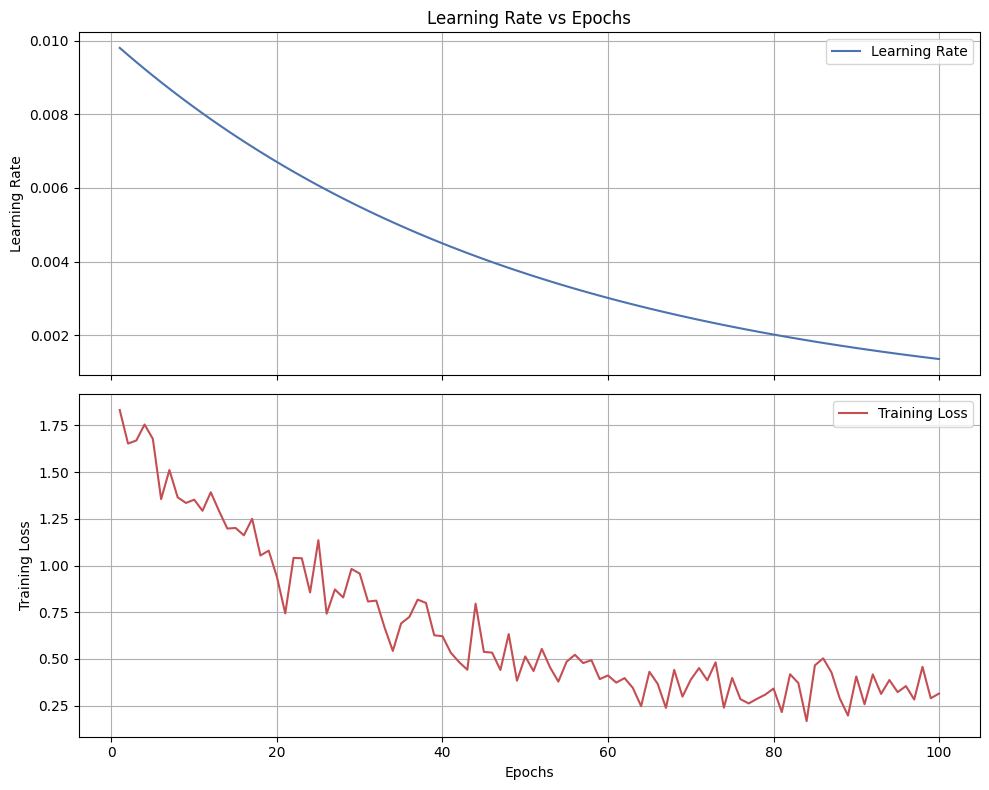

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_rate(epochs, learning_rates, train_losses=None):
    """
    Plot learning rate vs epochs, optionally with training loss

    Args:
        epochs: List/array of epoch numbers
        learning_rates: List/array of learning rates
        train_losses: Optional list/array of training losses
    """
    # Create figure with one or two subplots
    if train_losses is not None:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    else:
        fig, ax1 = plt.subplots(figsize=(10, 5))

    # Plot learning rate
    ax1.plot(epochs, learning_rates, 'b-', label='Learning Rate')
    ax1.set_ylabel('Learning Rate')
    ax1.set_title('Learning Rate vs Epochs')
    ax1.grid(True)
    ax1.legend()

    # Plot training loss if provided
    if train_losses is not None:
        ax2.plot(epochs, train_losses, 'r-', label='Training Loss')
        ax2.set_xlabel('Epochs')
        ax2.set_ylabel('Training Loss')
        ax2.grid(True)
        ax2.legend()
    else:
        ax1.set_xlabel('Epochs')

    plt.tight_layout()
    plt.show()

# Example usage
epochs = np.arange(1, 101)
# Simulating learning rate decay
learning_rates = 0.01 * np.exp(-0.02 * epochs)
# Simulating training loss
train_losses = 1.5 * np.exp(-0.03 * epochs) + 0.2 + 0.1 * np.random.randn(len(epochs))

# Plot with both learning rate and loss
plot_learning_rate(epochs, learning_rates, train_losses)

# Plot learning rate only
# plot_learning_rate(epochs, learning_rates)

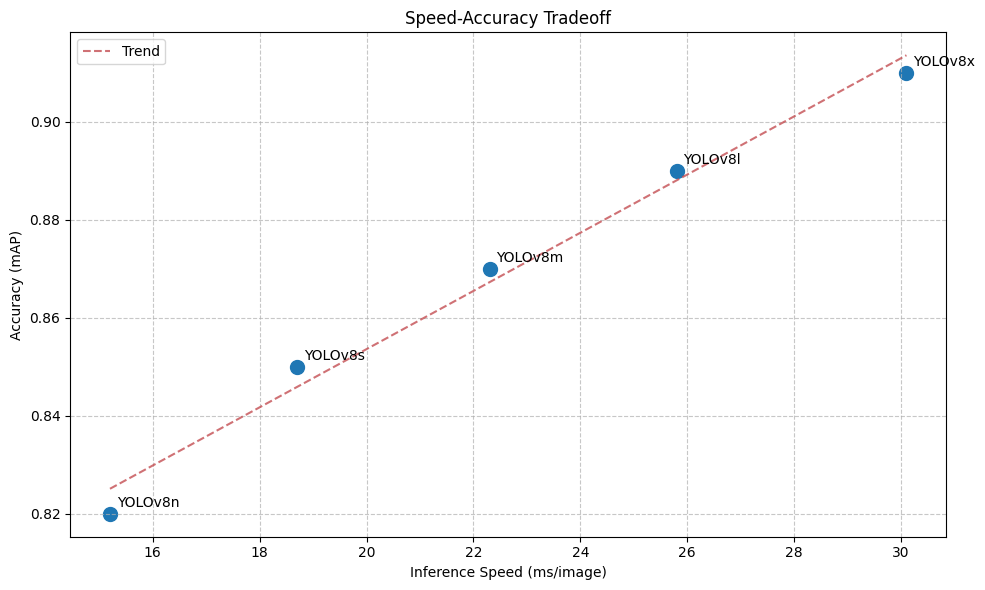

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_speed_accuracy_tradeoff(inference_speeds, accuracies, model_names=None):
    """
    Plot inference speed vs accuracy tradeoff

    Args:
        inference_speeds: List of inference speeds (ms)
        accuracies: List of corresponding accuracies (mAP or other metric)
        model_names: Optional list of model names/configurations
    """
    plt.figure(figsize=(10, 6))

    if model_names:
        # Scatter plot with model names
        plt.scatter(inference_speeds, accuracies, s=100)
        for i, name in enumerate(model_names):
            plt.annotate(name, (inference_speeds[i], accuracies[i]),
                        xytext=(5, 5), textcoords='offset points')
    else:
        plt.scatter(inference_speeds, accuracies, s=100, color='blue')

    plt.xlabel('Inference Speed (ms/image)')
    plt.ylabel('Accuracy (mAP)')
    plt.title('Speed-Accuracy Tradeoff')

    # Add trend line
    z = np.polyfit(inference_speeds, accuracies, 1)
    p = np.poly1d(z)
    plt.plot(inference_speeds, p(inference_speeds), "r--", alpha=0.8, label='Trend')

    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage
inference_speeds = [15.2, 18.7, 22.3, 25.8, 30.1]
accuracies = [0.82, 0.85, 0.87, 0.89, 0.91]
model_names = ['YOLOv8n', 'YOLOv8s', 'YOLOv8m', 'YOLOv8l', 'YOLOv8x']

plot_speed_accuracy_tradeoff(inference_speeds, accuracies, model_names)